In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Create dataset from Dataset.data file

In [187]:
def create_dataset(filename, cols):
    with open(filename) as myfile:
        data = myfile.read()
        data = data.split('\n')
        data = [x for x in data if len(x) != 0]

        for i in range(len(data)):
            data[i] = data[i].split()

        df = pd.DataFrame(data, columns = cols)
        df = df.drop_duplicates(keep = 'first') # Dropping duplicates
    return df

filename = "Dataset.data"
cols = "age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, class"
cols = cols.split(", ")
df = create_dataset(filename, cols)
df[cols] = df[cols].replace({'?':np.nan})

# Exploratory Data Analysis

In [188]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [189]:
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,48790,45995,48790,48790,48790,48790,45985,48790,48790,48790,48790,48790,48790,47934,48790
unique,74,8,28523,16,16,7,14,6,5,2,123,99,96,41,2
top,36,Private,203488,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
freq,1348,33860,21,15770,15770,22366,6165,19703,41714,32614,44755,46508,22773,43792,37109


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48790 non-null  object
 1   workclass       45995 non-null  object
 2   fnlwgt          48790 non-null  object
 3   education       48790 non-null  object
 4   education-num   48790 non-null  object
 5   marital-status  48790 non-null  object
 6   occupation      45985 non-null  object
 7   relationship    48790 non-null  object
 8   race            48790 non-null  object
 9   sex             48790 non-null  object
 10  capital-gain    48790 non-null  object
 11  capital-loss    48790 non-null  object
 12  hours-per-week  48790 non-null  object
 13  native-country  47934 non-null  object
 14  class           48790 non-null  object
dtypes: object(15)
memory usage: 6.0+ MB


In [191]:
df.isnull().sum()

age                  0
workclass         2795
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2805
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     856
class                0
dtype: int64

Hence, workclass, occupation and native-country columns have null values. All these are categorical in nature.

Since the percentage of the null values is less, we are going to remove them. However, we can employ supervised learning algorithms to predict the missing values.

In [192]:
df.dropna(axis=0, inplace=True)

In [193]:
df.shape

(45175, 15)

In [194]:
print("%30s %10s %20s\n" % ("Column Name", "Data Type", "Unique Values"))
columns = df.columns
for i in range(len(df.columns)):
    print("%30s %10s %10s" % (df.columns[i], df[columns[i]].dtypes, df[columns[i]].nunique()))

                   Column Name  Data Type        Unique Values

                           age     object         74
                     workclass     object          7
                        fnlwgt     object      26741
                     education     object         16
                 education-num     object         16
                marital-status     object          7
                    occupation     object         14
                  relationship     object          6
                          race     object          5
                           sex     object          2
                  capital-gain     object        121
                  capital-loss     object         97
                hours-per-week     object         96
                native-country     object         41
                         class     object          2


### Frequency of elements in all categorical columns

				 age
36    1283
33    1279
31    1273
35    1271
23    1237
      ... 
85       5
88       5
87       1
86       1
89       1
Name: age, Length: 74, dtype: int64


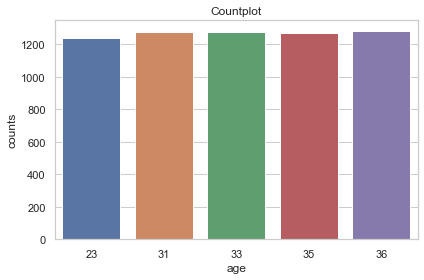




				 workclass
Private             33262
Self-emp-not-inc     3795
Local-gov            3100
State-gov            1946
Self-emp-inc         1645
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64


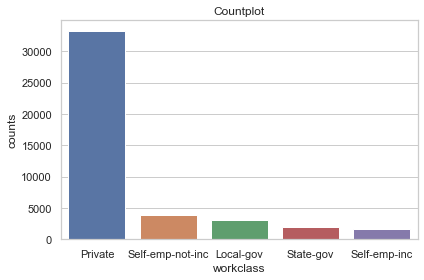




				 fnlwgt
203488    21
120277    18
125892    18
113364    17
126569    17
          ..
289207     1
249977     1
354691     1
167789     1
115420     1
Name: fnlwgt, Length: 26741, dtype: int64


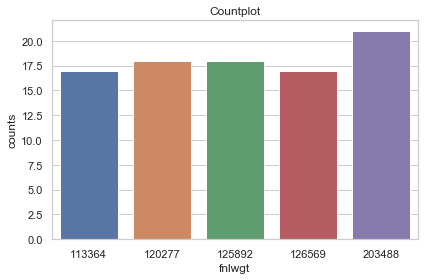




				 education
HS-grad         14770
Some-college     9887
Bachelors        7559
Masters          2513
Assoc-voc        1958
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           822
Prof-school       785
9th               676
12th              575
Doctorate         544
5th-6th           447
1st-4th           220
Preschool          70
Name: education, dtype: int64


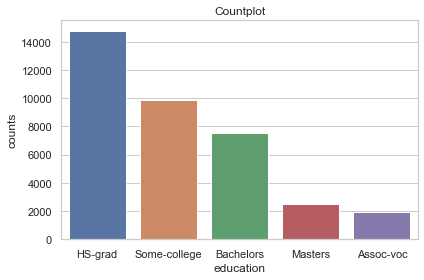




				 education-num
9     14770
10     9887
13     7559
14     2513
11     1958
7      1619
12     1507
6      1223
4       822
15      785
5       676
8       575
16      544
3       447
2       220
1        70
Name: education-num, dtype: int64


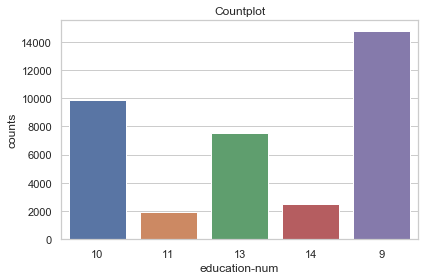




				 marital-status
Married-civ-spouse       21042
Never-married            14567
Divorced                  6294
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: marital-status, dtype: int64


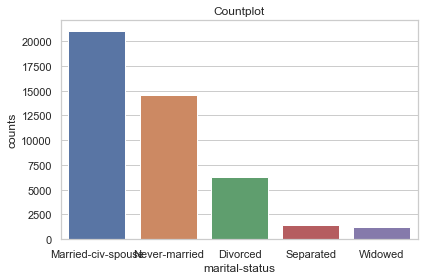




				 occupation
Craft-repair         6010
Prof-specialty       6001
Exec-managerial      5980
Adm-clerical         5535
Sales                5405
Other-service        4805
Machine-op-inspct    2965
Transport-moving     2316
Handlers-cleaners    2045
Farming-fishing      1475
Tech-support         1419
Protective-serv       975
Priv-house-serv       230
Armed-Forces           14
Name: occupation, dtype: int64


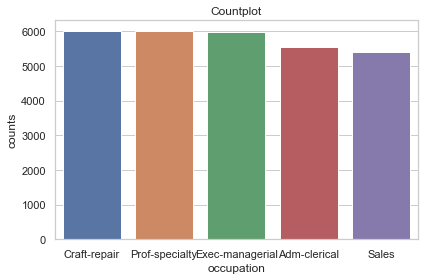




				 relationship
Husband           18653
Not-in-family     11679
Own-child          6616
Unmarried          4787
Wife               2091
Other-relative     1349
Name: relationship, dtype: int64


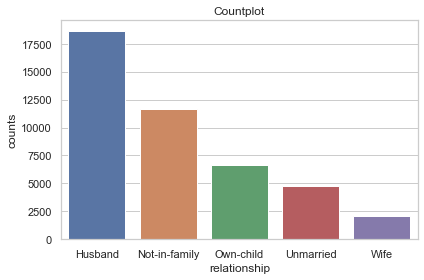




				 race
White                 38859
Black                  4227
Asian-Pac-Islander     1301
Amer-Indian-Eskimo      435
Other                   353
Name: race, dtype: int64


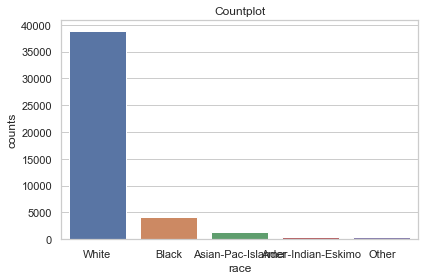




				 sex
Male      30495
Female    14680
Name: sex, dtype: int64


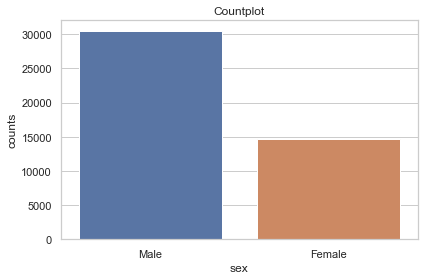




				 capital-gain
0        41385
15024      498
7688       391
7298       351
99999      229
         ...  
1639         1
1731         1
7262         1
22040        1
2387         1
Name: capital-gain, Length: 121, dtype: int64


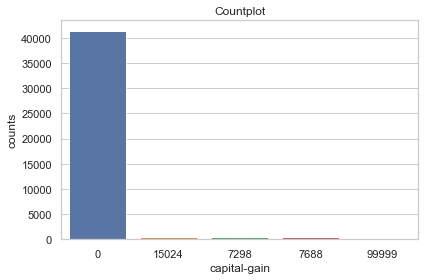




				 capital-loss
0       43035
1902      294
1977      246
1887      228
2415       68
        ...  
419         1
1870        1
2201        1
155         1
1421        1
Name: capital-loss, Length: 97, dtype: int64


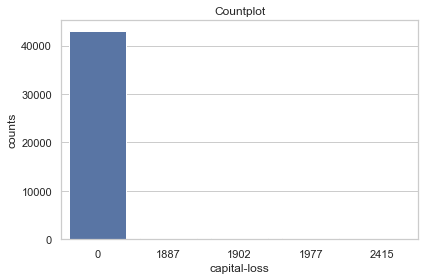




				 hours-per-week
40    21332
50     4091
45     2600
60     2085
35     1773
      ...  
94        1
79        1
87        1
82        1
69        1
Name: hours-per-week, Length: 96, dtype: int64


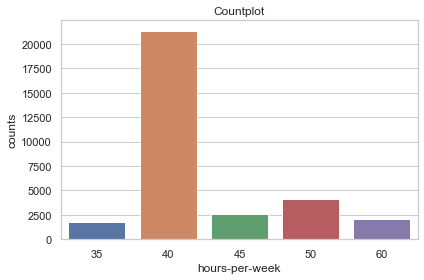




				 native-country
United-States                 41256
Mexico                          895
Philippines                     282
Germany                         193
Puerto-Rico                     175
Canada                          163
India                           147
El-Salvador                     147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        84
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuad

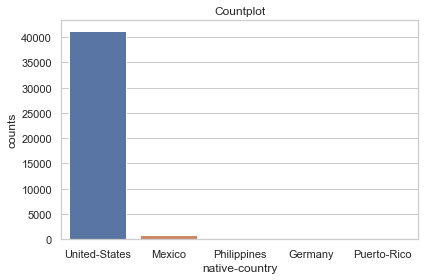




				 class
<=50K    33973
>50K     11202
Name: class, dtype: int64


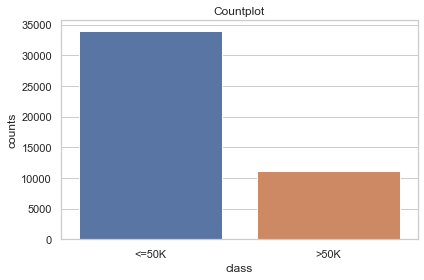

In [195]:
for i in df.columns:
    print('\t\t\t\t',i)
    print(df[i].value_counts())
    plt.title('Countplot')
    plt.ylabel('counts')
    plt.xlabel(i)
    sns.barplot(df[i].value_counts().index[:5] , df[i].value_counts().values[:5])
    plt.tight_layout()
    plt.show()
    print('\n\n')

In [196]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

### Changing Data Types of the columns

In [197]:
int_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in int_cols:
    df[col] = df[col].astype(int)

### Data Cleaning

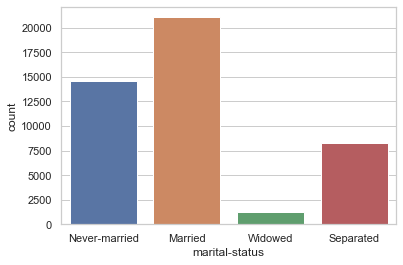

In [198]:
df['marital-status'].replace({'Married-civ-spouse' : 'Married' ,
                              'Divorced' : 'Separated' , 
                              'Married-AF-spouse' : 'Married' , 
                              'Married-spouse-absent':'Separated'},inplace = True)

sns.countplot(df['marital-status'])

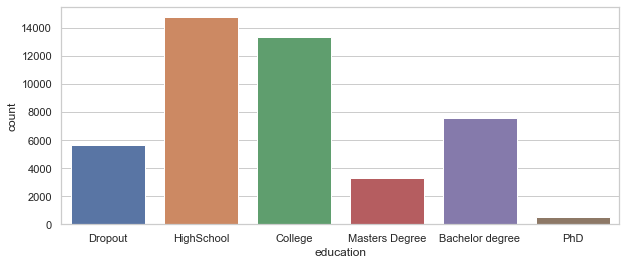

In [199]:
df['education'].replace({'HS-grad':'HighSchool' , 
                         'Some-college':'College' , 
                         'Bachelors' : 'Bachelor degree' , 
                         'Masters' : 'Masters Degree' ,
                         'Assoc-voc' : 'College' , 
                         'Assoc-acdm':'College' , 
                         'Prof-school' : 'Masters Degree' , 
                         'Doctorate' : 'PhD' , 
                         '11th' : 'Dropout' , 
                         '10th' : 'Dropout' ,
                         '7th-8th' : 'Dropout' ,
                         '9th' : 'Dropout' , 
                         '12th' : 'Dropout' ,
                         '5th-6th': 'Dropout' ,
                         '1st-4th': 'Dropout' ,
                         'Preschool':'Dropout'} , inplace = True)

plt.figure(figsize=(10,4))
sns.countplot(df['education'])

## Box Plots and Distribution Plots

In [200]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

				 age


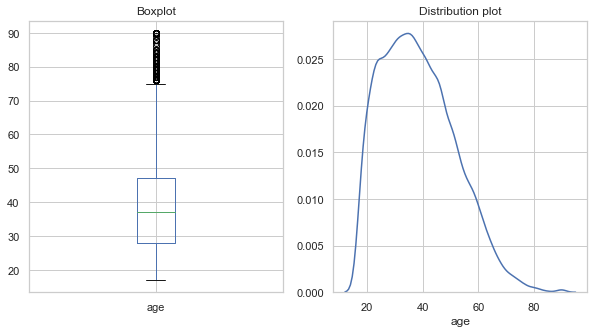

				 fnlwgt


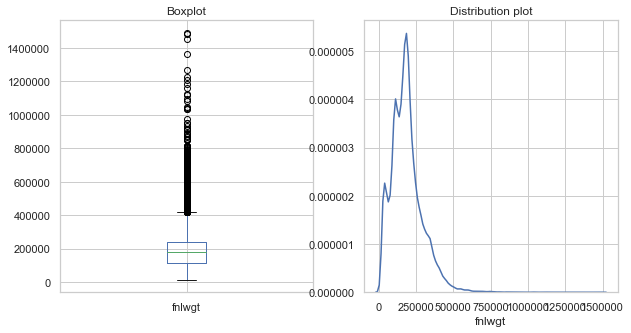

				 education-num


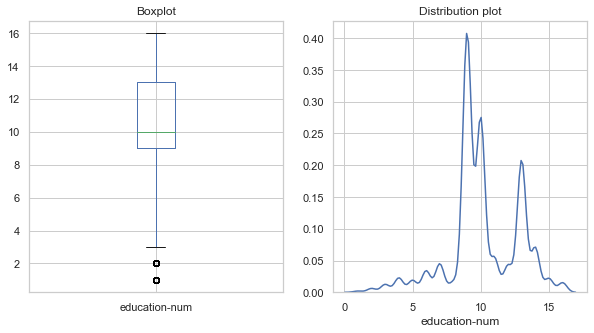

				 hours-per-week


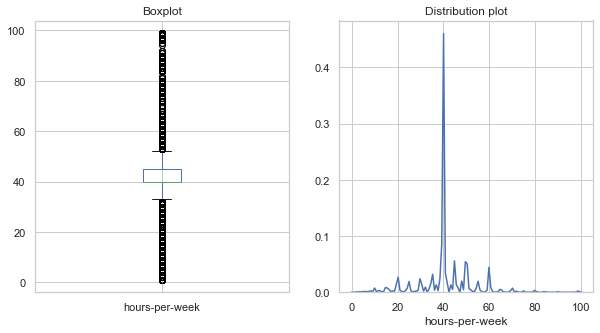

In [201]:
for i in ['age','fnlwgt','education-num','hours-per-week']:
    print('\t\t\t\t',i)
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title('Boxplot')
    df[i].plot(kind= 'box')
    plt.subplot(1,2,2)
    plt.title('Distribution plot')
    sns.distplot(df[i],hist = False )
    plt.show()

## Correlation Heatmap

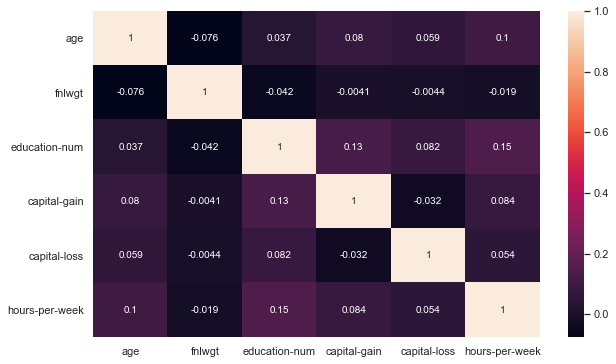

In [202]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr() , annot =True)

Hence, there is no correlation between any of the columns.

### Hours per week vs Education

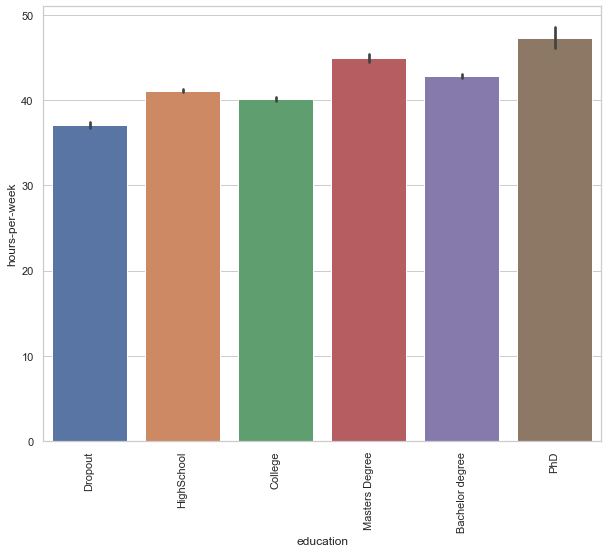

In [203]:
plt.figure(figsize=(10,8))
plot = sns.barplot(x = df['education'], y = df['hours-per-week'], data = df)
plt.setp(plot.get_xticklabels(), rotation=90);

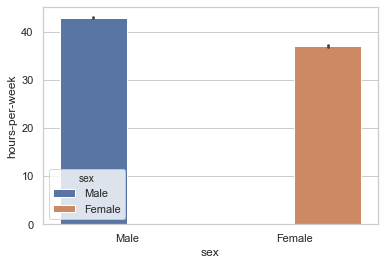

In [204]:
sns.barplot(x = df['sex'], y = df['hours-per-week'], data = df, hue = 'sex')

### Income vs native country

In [205]:
df['native-country'].value_counts()

United-States                 41256
Mexico                          895
Philippines                     282
Germany                         193
Puerto-Rico                     175
Canada                          163
India                           147
El-Salvador                     147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        84
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

The total number of USA applicants is the highest, hence, for analysis, I will be removing it.

In [206]:
native_more = df.loc[df['class'] == '>50K',['native-country']].groupby('native-country').size()
native_less = df.loc[df['class'] == '<=50K',['native-country']].groupby('native-country').size()
index_more = list(native_more.index)
index_less = list(native_less.index)
dfmore = pd.DataFrame({'Countries' : index_more, '>50K' : list(native_more) })
dfless = pd.DataFrame({'Countries' : index_less, '<=50K' : list(native_less) })
dffin = pd.merge(dfless, dfmore, on = 'Countries')
dffin = dffin[dffin['Countries'] != 'United-States']

[Text(0, 0, 'Germany'),
 Text(0, 0, 'Ireland'),
 Text(0, 0, 'Cuba'),
 Text(0, 0, 'Philippines'),
 Text(0, 0, 'Iran'),
 Text(0, 0, 'Greece'),
 Text(0, 0, 'Honduras'),
 Text(0, 0, 'Laos'),
 Text(0, 0, 'Mexico'),
 Text(0, 0, 'South'),
 Text(0, 0, 'Columbia'),
 Text(0, 0, 'Vietnam'),
 Text(0, 0, 'Taiwan'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Outlying-US(Guam-USVI-etc)'),
 Text(0, 0, 'Cambodia'),
 Text(0, 0, 'Dominican-Republic'),
 Text(0, 0, 'Hong'),
 Text(0, 0, 'Haiti'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'England'),
 Text(0, 0, 'Peru'),
 Text(0, 0, 'Hungary'),
 Text(0, 0, 'Nicaragua'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Yugoslavia'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'El-Salvador'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'Ecuador'),
 Text(0, 0, 'Guatemala'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Jamaica'),
 Text(0, 0, 'Puerto-Rico'),
 Text(0, 0, 'India'),
 Text(0, 0, 'Trinadad&Tobago'),
 Text(0, 0, 'Thailand'),
 Text(0, 0, 'Scotland')]

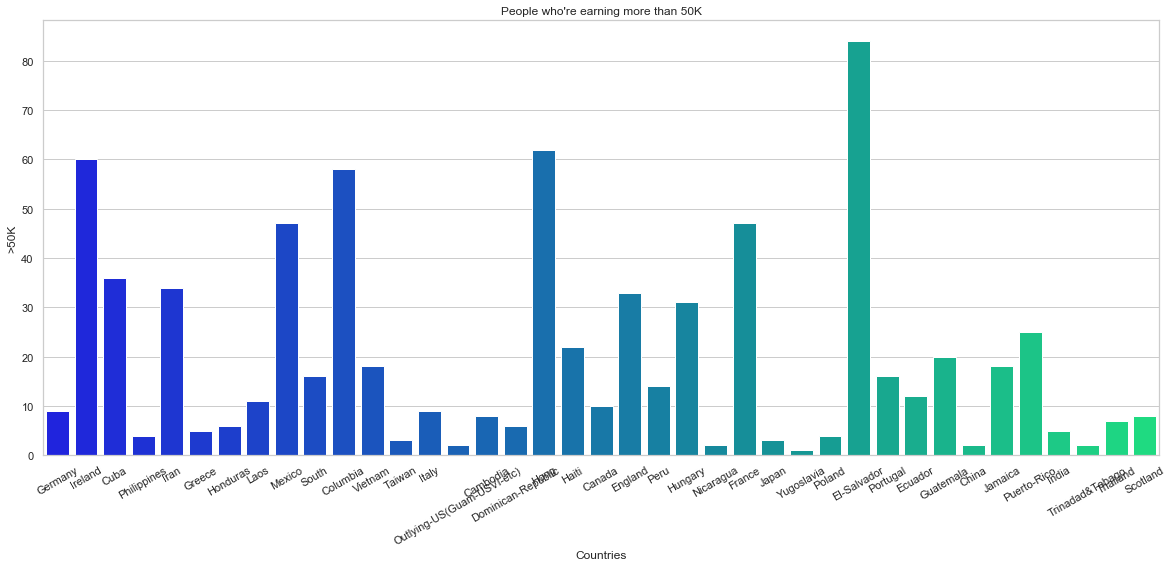

In [207]:
plt.figure(figsize = (20, 8))
g = sns.barplot(x = dffin['Countries'], y = dffin['>50K'], data = dffin, palette = 'winter')
plt.title("People who're earning more than 50K")
countries = set(dffin['Countries'])
g.set_xticklabels(rotation=30, labels = countries)

[Text(0, 0, 'Germany'),
 Text(0, 0, 'Ireland'),
 Text(0, 0, 'Cuba'),
 Text(0, 0, 'Philippines'),
 Text(0, 0, 'Iran'),
 Text(0, 0, 'Greece'),
 Text(0, 0, 'Honduras'),
 Text(0, 0, 'Laos'),
 Text(0, 0, 'Mexico'),
 Text(0, 0, 'South'),
 Text(0, 0, 'Columbia'),
 Text(0, 0, 'Vietnam'),
 Text(0, 0, 'Taiwan'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Outlying-US(Guam-USVI-etc)'),
 Text(0, 0, 'Cambodia'),
 Text(0, 0, 'Dominican-Republic'),
 Text(0, 0, 'Hong'),
 Text(0, 0, 'Haiti'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'England'),
 Text(0, 0, 'Peru'),
 Text(0, 0, 'Hungary'),
 Text(0, 0, 'Nicaragua'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Yugoslavia'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'El-Salvador'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'Ecuador'),
 Text(0, 0, 'Guatemala'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Jamaica'),
 Text(0, 0, 'Puerto-Rico'),
 Text(0, 0, 'India'),
 Text(0, 0, 'Trinadad&Tobago'),
 Text(0, 0, 'Thailand'),
 Text(0, 0, 'Scotland')]

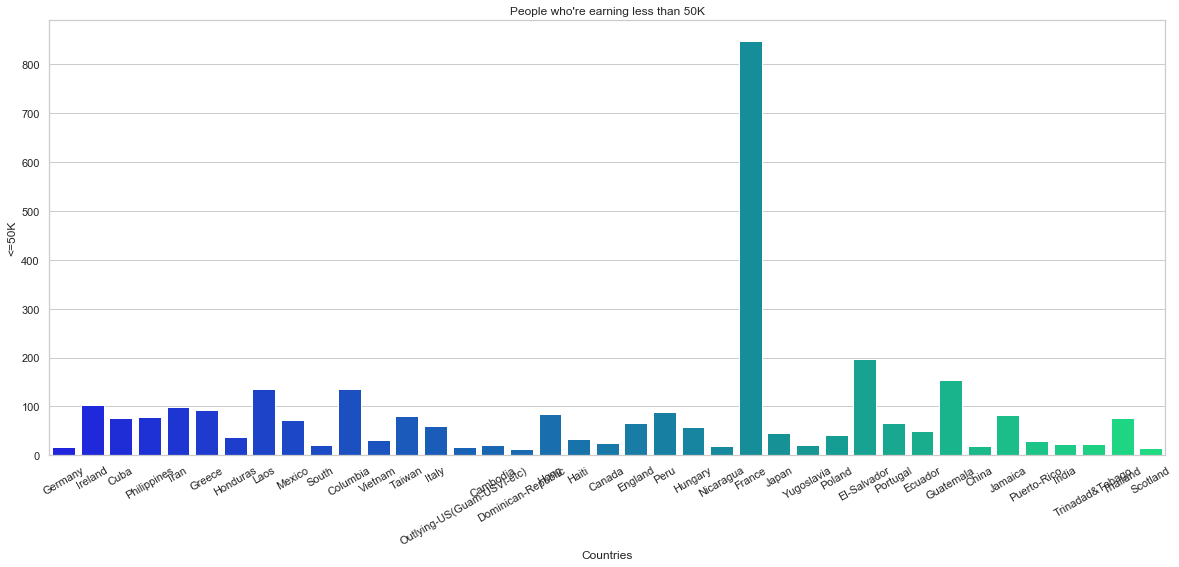

In [208]:
plt.figure(figsize = (20, 8))
g = sns.barplot(x = dffin['Countries'], y = dffin['<=50K'], data = dffin, palette = 'winter')
plt.title("People who're earning less than 50K")
countries = set(dffin['Countries'])
g.set_xticklabels(rotation=30, labels = countries)

### Income vs workclass

In [209]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

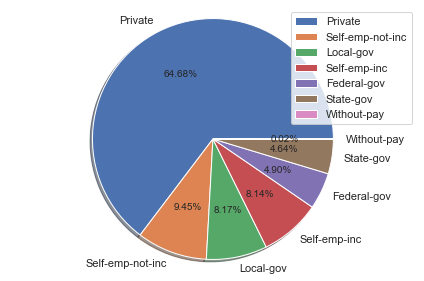

In [210]:
# Creating Pandas Series for the workclasses whose income is higher than 50K 
df_work = df.loc[df['class'] == '>50K',['workclass']]
workclass_types = df_work['workclass'].value_counts()
labels = list(workclass_types.index)
aggregate = list(workclass_types)

# This Pie chat shows the Percentage of different workclass who earns more than 50K
plt.pie(aggregate, labels = labels, autopct='%1.2f%%', shadow=True)
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show()

### Income vs education

Text(0.5, 1.0, 'People grouped by their education')

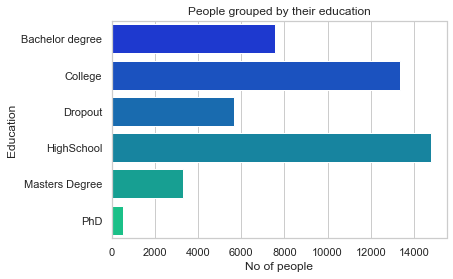

In [211]:
education_size = df.groupby('education').size()

# Grouping people who earns more than 50K by their education
more_income = df.loc[df['class'] == '>50K', ['education']].groupby('education').size()


# Barplot for the people grouped by their education
sns.barplot(x = list(education_size), y = list(education_size.index), palette = 'winter')
plt.xlabel('No of people')
plt.ylabel('Education')
plt.title('People grouped by their education')

Text(0.5, 1.0, 'People who are earning more than 50k')

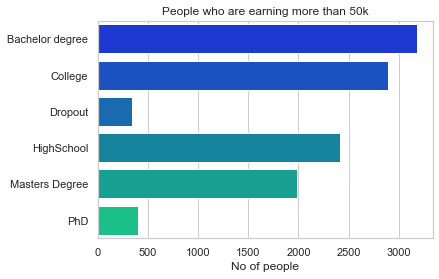

In [212]:
# Barplot for the people who earns more than 50K grouped by their education
sns.barplot(x = list(more_income), y = list(more_income.index), palette = 'winter')
plt.xlabel('No of people')
plt.title('People who are earning more than 50k')

# Modelling

In [213]:
# Importing the required libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
import warnings; warnings.simplefilter('ignore')

In [214]:
# Changing the income column into Numerical Value
df['class'] = df['class'].map({'<=50K':0, '>50K':1})

In [215]:
df['class'].value_counts()

0    33973
1    11202
Name: class, dtype: int64

In [216]:
# Changing the Categorical Values to Numerical values using the Label Encoder
from sklearn.preprocessing import LabelEncoder

categorical_features = list(df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,2,226802,2,7,1,6,3,2,1,0,0,40,38,0
1,38,2,89814,3,9,0,4,0,4,1,0,0,50,38,0
2,28,1,336951,1,12,0,10,0,4,1,0,0,40,38,1
3,44,2,160323,1,10,0,6,0,2,1,7688,0,40,38,1
5,34,2,198693,2,6,1,7,1,4,1,0,0,30,38,0


In [227]:
from sklearn.utils import shuffle
df = shuffle(df)

from sklearn.model_selection import train_test_split

features_ = df.drop(columns = ['class', 'education-num'])
target = df['class']

X_train, X_test, y_train, y_test = train_test_split(features_, target, test_size = 0.3,random_state = 0)

print ("Train data set size:", X_train.shape)
print ("Test data set size:", X_test.shape)

Train data set size: (31622, 13)
Test data set size: (13553, 13)


## Logistic Regression

In [230]:
logistic = LogisticRegression(C = 0.5, max_iter = 500)
lr = logistic.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print ("The accuracy of logistic regression model:", accuracy_score(y_test, lr_pred))
print ("The f1 score of logistic regression model:", f1_score(y_test, lr_pred, average = 'binary'))

The accuracy of logistic regression model: 0.7936250276691508
The f1 score of logistic regression model: 0.38648826497038824


In [236]:
print(classification_report(y_test, lr_pred, target_names = ["<=50K", ">50K"]))

              precision    recall  f1-score   support

       <=50K       0.80      0.97      0.88     10210
        >50K       0.72      0.26      0.39      3343

    accuracy                           0.79     13553
   macro avg       0.76      0.62      0.63     13553
weighted avg       0.78      0.79      0.76     13553



In [242]:
print(confusion_matrix(y_test, lr_pred))

[[9875  335]
 [2462  881]]


## Decision Tree Classifier

In [231]:
clf = DecisionTreeClassifier(random_state=0)
dtc = clf.fit(X_train, y_train)

dtc_pred = dtc.predict(X_test)

print ("The accuracy of decision tree classifier:", accuracy_score(y_test, dtc_pred))
print ("The f1 score of decision tree classifier:", f1_score(y_test, dtc_pred, average = 'binary'))

The accuracy of decision tree classifier: 0.808012986054748
The f1 score of decision tree classifier: 0.6136026136026135


In [237]:
print(classification_report(y_test, dtc_pred, target_names = ["<=50K", ">50K"]))

              precision    recall  f1-score   support

       <=50K       0.87      0.87      0.87     10210
        >50K       0.61      0.62      0.61      3343

    accuracy                           0.81     13553
   macro avg       0.74      0.74      0.74     13553
weighted avg       0.81      0.81      0.81     13553



In [243]:
print(confusion_matrix(y_test, dtc_pred))

[[8885 1325]
 [1277 2066]]


## Random Forest Classifier

In [232]:
random_forest = RandomForestClassifier(n_estimators = 200)
rfc = random_forest.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

print ("The accuracy of random forest classifier:", accuracy_score(y_test, rfc_pred))
print ("The f1 score of random forest classifier:", f1_score(y_test, rfc_pred, average = 'binary'))

The accuracy of random forest classifier: 0.8526525492510884
The f1 score of random forest classifier: 0.6754428733950918


In [238]:
print(classification_report(y_test, rfc_pred, target_names = ["<=50K", ">50K"]))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90     10210
        >50K       0.74      0.62      0.68      3343

    accuracy                           0.85     13553
   macro avg       0.81      0.77      0.79     13553
weighted avg       0.85      0.85      0.85     13553



In [244]:
print(confusion_matrix(y_test, rfc_pred))

[[9478  732]
 [1265 2078]]


## Bernoulli Naive Bayes

In [233]:
naive_bayes = BernoulliNB(alpha = 0.35)
nb = naive_bayes.fit(X_train, y_train)

nb_pred = nb.predict(X_test)

print ("The accuracy of bernoulli naive bayes: ", accuracy_score(y_test, nb_pred))
print ("The f1 score of bernoulli naive bayes: ", f1_score(y_test, nb_pred, average = 'binary'))

The accuracy of bernoulli naive bayes:  0.7276617723013356
The f1 score of bernoulli naive bayes:  0.5781232140816094


In [239]:
print(classification_report(y_test, nb_pred, target_names = ["<=50K", ">50K"]))

              precision    recall  f1-score   support

       <=50K       0.90      0.72      0.80     10210
        >50K       0.47      0.76      0.58      3343

    accuracy                           0.73     13553
   macro avg       0.68      0.74      0.69     13553
weighted avg       0.79      0.73      0.74     13553



In [245]:
print(confusion_matrix(y_test, nb_pred))

[[7333 2877]
 [ 814 2529]]


## Support Vector Machine

In [234]:
svc = SVC(kernel = 'rbf', max_iter = 1000, probability = True)
svm = svc.fit(X_train, y_train)

svm_pred = svm.predict(X_test)

print ("The accuracy of support vector machine:", accuracy_score(y_test, svm_pred))
print ("The f1 score of support vector machine:", f1_score(y_test, svm_pred, average = 'binary'))

The accuracy of support vector machine: 0.43916476056961556
The f1 score of support vector machine: 0.34939655910297013


In [240]:
print(classification_report(y_test, svm_pred, target_names = ["<=50K", ">50K"]))

              precision    recall  f1-score   support

       <=50K       0.75      0.38      0.51     10210
        >50K       0.24      0.61      0.35      3343

    accuracy                           0.44     13553
   macro avg       0.50      0.50      0.43     13553
weighted avg       0.63      0.44      0.47     13553



In [246]:
print(confusion_matrix(y_test, svm_pred))

[[3911 6299]
 [1302 2041]]


### ROC Curve

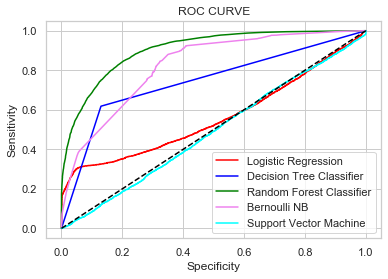

In [247]:
from sklearn.metrics import roc_auc_score, roc_curve
models = [lr, dtc, rfc, nb, svm]
model_names = ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier", "Bernoulli NB", "Support Vector Machine"]


color = ['red', 'blue', 'green', 'violet', 'cyan']
plt.title("ROC CURVE")
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")
i = 1

for i, model in enumerate(models) :
    prob = model.predict_proba(X_test)
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, prob_positive)
    plt.plot(fpr, tpr, color = color[i])
    plt.gca().legend(model_names, loc = 'lower right', frameon = True)

plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()